# Reseach Topic: Predict Wage with Machline Methods
## What am I doing ?
I have no idea.

## Data
The source of data is NLSY97. The portal can be accessed from [here](https://www.nlsinfo.org/investigator/pages/search.jsp?s=NLSY97). The data set is pre-cleaned by STATA with around 4500 obervations each year from 2. Features include age, year of experience, gender, schooling, race, marital status, industry, region(not yet!!). 

## Run some models
Bofore running anything, we split the data into training set, validation set, test set. <br/> I am preparing to do the following models:
- Linear model (mincer equations)
- Trees and Forests
- Neural Nets

The performences of models will be compared in accuracy and R-square

## Further thoughts
What can we do besides running those well-defined models on a dataset and seeing some results we already know.


In [4]:
import warnings
warnings.filterwarnings("ignore") # turn off warnings a bit

# Let's get started :D

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

'''Preprocessing Steps
'''
data_path = './data/mincer.xlsx'
#dat.describe(include="all")
dat = pd.read_excel(data_path)
dat = dat.fillna(0)


In [47]:
dat_tmp = dat[dat['year']==2015]
train, test =  train_test_split(dat_tmp, test_size = 0.25, random_state = 12)
y_train, X_train, y_test, X_test = train['lnwage'], train.iloc[:,4:], test['lnwage'], test.iloc[:,4:]

In [48]:
import models

# Model 1: Linear Model (Mincer Equation)
It is a panel data regression using random effect model.

In [49]:
r2 = mincer(X_train, y_train,  X_test, y_test)
print(r2)

0.16406052219835443


# Model 2: Random Forest

In [50]:
trees(X_train, y_train, X_test, y_test, n_estimators=50, max_depth=5)

0.07022620887151076

# Model 3: Neural Nets
Use the most basic model, multilayer perceptron (MLP)

In [51]:
nn(X_train, y_train, X_test, y_test)

Train on 3350 samples, validate on 1117 samples
Epoch 1/5
3350/3350 [==============================] - 1s 366us/step - loss: 38.6974 - val_loss: 24.2731
Epoch 2/5
3350/3350 [==============================] - 1s 176us/step - loss: 18.5752 - val_loss: 23.7931
Epoch 3/5
3350/3350 [==============================] - 1s 176us/step - loss: 18.3156 - val_loss: 23.6480
Epoch 4/5
3350/3350 [==============================] - 1s 173us/step - loss: 18.2133 - val_loss: 23.6424
Epoch 5/5
3350/3350 [==============================] - 1s 176us/step - loss: 18.1737 - val_loss: 23.7056
The r_squrare of this MLP is: 0.48
(1117,) (1117,)


0.012844338394809252

# Performance Over the Years
Now I am running the models over the years (2005 to 2011, 2013, 2015). 

In [72]:
years = [i for i in range(2005,2012)]+[2013]+[2015]
res={}
res['ols'],res['trees'], res['nets'] = [],[],[]
for y in years:
    print("---------current test year is {}---------".format(y) )
    data = dat[dat['year']==y]
    train, test =  train_test_split(data, test_size = 0.25, random_state = 12)
    y_train, X_train, y_test, X_test = train['lnwage'], train.iloc[:,4:], test['lnwage'], test.iloc[:,4:]
    res['ols'].append( mincer(X_train, y_train,  X_test, y_test) )
    res['trees'].append( trees(X_train, y_train, X_test, y_test, n_estimators=50, max_depth=5) )
    res['nets'].append(nn(X_train, y_train, X_test, y_test))
    

---------current test year is 2005---------
Train on 3525 samples, validate on 1175 samples
Epoch 1/200
3525/3525 [==============================] - 1s 359us/step - loss: 92.2099 - val_loss: 84.4956
Epoch 2/200
3525/3525 [==============================] - 1s 143us/step - loss: 77.7263 - val_loss: 70.4645
Epoch 3/200
3525/3525 [==============================] - 0s 138us/step - loss: 64.5446 - val_loss: 58.4736
Epoch 4/200
3525/3525 [==============================] - 1s 150us/step - loss: 53.6733 - val_loss: 48.2661
Epoch 5/200
3525/3525 [==============================] - 1s 147us/step - loss: 43.7569 - val_loss: 38.7822
Epoch 6/200
3525/3525 [==============================] - 1s 148us/step - loss: 34.5016 - val_loss: 29.9246
Epoch 7/200
3525/3525 [==============================] - 1s 147us/step - loss: 27.4699 - val_loss: 24.9804
Epoch 8/200
3525/3525 [==============================] - 1s 166us/step - loss: 24.4088 - val_loss: 23.7197
Epoch 9/200
3525/3525 [=============================

3525/3525 [==============================] - 0s 137us/step - loss: 23.5505 - val_loss: 23.4888
Epoch 77/200
3525/3525 [==============================] - 0s 140us/step - loss: 23.5491 - val_loss: 23.4888
Epoch 78/200
3525/3525 [==============================] - 1s 143us/step - loss: 23.5508 - val_loss: 23.4917
Epoch 79/200
3525/3525 [==============================] - 1s 144us/step - loss: 23.5486 - val_loss: 23.4880
Epoch 80/200
3525/3525 [==============================] - 1s 143us/step - loss: 23.5555 - val_loss: 23.4868
Epoch 81/200
3525/3525 [==============================] - 1s 144us/step - loss: 23.5486 - val_loss: 23.4878
Epoch 82/200
3525/3525 [==============================] - 1s 143us/step - loss: 23.5491 - val_loss: 23.4896
Epoch 83/200
3525/3525 [==============================] - 0s 126us/step - loss: 23.5493 - val_loss: 23.4925
Epoch 84/200
3525/3525 [==============================] - 1s 146us/step - loss: 23.5457 - val_loss: 23.4865
Epoch 85/200
3525/3525 [=================

3525/3525 [==============================] - 0s 142us/step - loss: 23.5506 - val_loss: 23.4904
Epoch 152/200
3525/3525 [==============================] - 1s 153us/step - loss: 23.5490 - val_loss: 23.4904
Epoch 153/200
3525/3525 [==============================] - 1s 155us/step - loss: 23.5522 - val_loss: 23.4921
Epoch 154/200
3525/3525 [==============================] - 1s 154us/step - loss: 23.5499 - val_loss: 23.4908
Epoch 155/200
3525/3525 [==============================] - 1s 150us/step - loss: 23.5519 - val_loss: 23.4933
Epoch 156/200
3525/3525 [==============================] - 0s 116us/step - loss: 23.5485 - val_loss: 23.4911
Epoch 157/200
3525/3525 [==============================] - 0s 138us/step - loss: 23.5501 - val_loss: 23.4893
Epoch 158/200
3525/3525 [==============================] - 0s 133us/step - loss: 23.5510 - val_loss: 23.4892
Epoch 159/200
3525/3525 [==============================] - 1s 142us/step - loss: 23.5467 - val_loss: 23.4864
Epoch 160/200
3525/3525 [========

Epoch 26/200
3708/3708 [==============================] - 1s 144us/step - loss: 20.9377 - val_loss: 20.2165
Epoch 27/200
3708/3708 [==============================] - 1s 153us/step - loss: 20.9596 - val_loss: 20.2013
Epoch 28/200
3708/3708 [==============================] - 1s 154us/step - loss: 20.9426 - val_loss: 20.2164
Epoch 29/200
3708/3708 [==============================] - 1s 154us/step - loss: 20.9545 - val_loss: 20.1984
Epoch 30/200
3708/3708 [==============================] - 1s 154us/step - loss: 20.9496 - val_loss: 20.1886
Epoch 31/200
3708/3708 [==============================] - 1s 159us/step - loss: 20.9505 - val_loss: 20.1948
Epoch 32/200
3708/3708 [==============================] - 1s 159us/step - loss: 20.9613 - val_loss: 20.1885
Epoch 33/200
3708/3708 [==============================] - 1s 149us/step - loss: 20.9432 - val_loss: 20.2074
Epoch 34/200
3708/3708 [==============================] - 1s 137us/step - loss: 20.9564 - val_loss: 20.2113
Epoch 35/200
3708/3708 [====

Epoch 102/200
3708/3708 [==============================] - 1s 170us/step - loss: 20.9392 - val_loss: 20.2310
Epoch 103/200
3708/3708 [==============================] - 1s 167us/step - loss: 20.9362 - val_loss: 20.2771
Epoch 104/200
3708/3708 [==============================] - 1s 167us/step - loss: 20.9372 - val_loss: 20.1943
Epoch 105/200
3708/3708 [==============================] - 1s 140us/step - loss: 20.9315 - val_loss: 20.2932
Epoch 106/200
3708/3708 [==============================] - 0s 118us/step - loss: 20.9506 - val_loss: 20.1972
Epoch 107/200
3708/3708 [==============================] - 0s 118us/step - loss: 20.9165 - val_loss: 20.2794
Epoch 108/200
3708/3708 [==============================] - 0s 118us/step - loss: 20.9416 - val_loss: 20.2068
Epoch 109/200
3708/3708 [==============================] - 0s 118us/step - loss: 20.9243 - val_loss: 20.2767
Epoch 110/200
3708/3708 [==============================] - 1s 135us/step - loss: 20.9393 - val_loss: 20.2102
Epoch 111/200
3708/

3708/3708 [==============================] - 1s 143us/step - loss: 20.9275 - val_loss: 20.1967
Epoch 178/200
3708/3708 [==============================] - 0s 127us/step - loss: 20.9332 - val_loss: 20.1942
Epoch 179/200
3708/3708 [==============================] - 1s 140us/step - loss: 20.9322 - val_loss: 20.2493
Epoch 180/200
3708/3708 [==============================] - 1s 165us/step - loss: 20.9277 - val_loss: 20.1929
Epoch 181/200
3708/3708 [==============================] - 1s 162us/step - loss: 20.9109 - val_loss: 20.1934
Epoch 182/200
3708/3708 [==============================] - 1s 165us/step - loss: 20.9217 - val_loss: 20.1952
Epoch 183/200
3708/3708 [==============================] - 0s 130us/step - loss: 20.9171 - val_loss: 20.2047
Epoch 184/200
3708/3708 [==============================] - 0s 121us/step - loss: 20.9327 - val_loss: 20.1969
Epoch 185/200
3708/3708 [==============================] - 1s 140us/step - loss: 20.9321 - val_loss: 20.1936
Epoch 186/200
3708/3708 [========

Epoch 52/200
3630/3630 [==============================] - 1s 168us/step - loss: 22.7960 - val_loss: 20.3605
Epoch 53/200
3630/3630 [==============================] - 1s 182us/step - loss: 22.8000 - val_loss: 20.5012
Epoch 54/200
3630/3630 [==============================] - 1s 184us/step - loss: 22.8045 - val_loss: 20.3631
Epoch 55/200
3630/3630 [==============================] - 1s 170us/step - loss: 22.7985 - val_loss: 20.3739
Epoch 56/200
3630/3630 [==============================] - 0s 130us/step - loss: 22.7896 - val_loss: 20.3667
Epoch 57/200
3630/3630 [==============================] - 0s 125us/step - loss: 22.7884 - val_loss: 20.3587
Epoch 58/200
3630/3630 [==============================] - 0s 130us/step - loss: 22.7946 - val_loss: 20.3625
Epoch 59/200
3630/3630 [==============================] - 1s 150us/step - loss: 22.7977 - val_loss: 20.3729
Epoch 60/200
3630/3630 [==============================] - 1s 163us/step - loss: 22.7835 - val_loss: 20.3733
Epoch 61/200
3630/3630 [====

3630/3630 [==============================] - 1s 152us/step - loss: 22.7949 - val_loss: 20.3751
Epoch 128/200
3630/3630 [==============================] - 1s 146us/step - loss: 22.7870 - val_loss: 20.3816
Epoch 129/200
3630/3630 [==============================] - 1s 145us/step - loss: 22.8078 - val_loss: 20.3653
Epoch 130/200
3630/3630 [==============================] - 1s 156us/step - loss: 22.8005 - val_loss: 20.4087
Epoch 131/200
3630/3630 [==============================] - 1s 156us/step - loss: 22.7982 - val_loss: 20.3951
Epoch 132/200
3630/3630 [==============================] - 1s 157us/step - loss: 22.7831 - val_loss: 20.4216
Epoch 133/200
3630/3630 [==============================] - 1s 157us/step - loss: 22.7938 - val_loss: 20.4173
Epoch 134/200
3630/3630 [==============================] - 1s 157us/step - loss: 22.7836 - val_loss: 20.3838
Epoch 135/200
3630/3630 [==============================] - 1s 156us/step - loss: 22.7787 - val_loss: 20.4094
Epoch 136/200
3630/3630 [========

3633/3633 [==============================] - 1s 352us/step - loss: 94.0400 - val_loss: 84.9260
Epoch 2/200
3633/3633 [==============================] - 1s 162us/step - loss: 77.2772 - val_loss: 70.6603
Epoch 3/200
3633/3633 [==============================] - 1s 171us/step - loss: 63.3579 - val_loss: 57.8720
Epoch 4/200
3633/3633 [==============================] - 1s 173us/step - loss: 51.3165 - val_loss: 46.0253
Epoch 5/200
3633/3633 [==============================] - 1s 173us/step - loss: 40.1236 - val_loss: 35.0298
Epoch 6/200
3633/3633 [==============================] - 1s 172us/step - loss: 30.0453 - val_loss: 25.8705
Epoch 7/200
3633/3633 [==============================] - 0s 131us/step - loss: 23.4429 - val_loss: 21.8255
Epoch 8/200
3633/3633 [==============================] - 0s 123us/step - loss: 21.1981 - val_loss: 20.6070
Epoch 9/200
3633/3633 [==============================] - 0s 133us/step - loss: 20.6760 - val_loss: 20.4315
Epoch 10/200
3633/3633 [=========================

3633/3633 [==============================] - 1s 152us/step - loss: 20.5930 - val_loss: 20.3647
Epoch 78/200
3633/3633 [==============================] - 1s 150us/step - loss: 20.5914 - val_loss: 20.3622
Epoch 79/200
3633/3633 [==============================] - 1s 141us/step - loss: 20.5924 - val_loss: 20.3612
Epoch 80/200
3633/3633 [==============================] - 1s 144us/step - loss: 20.5880 - val_loss: 20.3640
Epoch 81/200
3633/3633 [==============================] - 1s 157us/step - loss: 20.5929 - val_loss: 20.3618
Epoch 82/200
3633/3633 [==============================] - 1s 152us/step - loss: 20.5925 - val_loss: 20.3607
Epoch 83/200
3633/3633 [==============================] - 1s 153us/step - loss: 20.5945 - val_loss: 20.3620
Epoch 84/200
3633/3633 [==============================] - 1s 138us/step - loss: 20.5917 - val_loss: 20.3607
Epoch 85/200
3633/3633 [==============================] - 1s 163us/step - loss: 20.5927 - val_loss: 20.3603
Epoch 86/200
3633/3633 [=================

3633/3633 [==============================] - 1s 154us/step - loss: 20.5927 - val_loss: 20.3649
Epoch 153/200
3633/3633 [==============================] - 1s 152us/step - loss: 20.5929 - val_loss: 20.3636
Epoch 154/200
3633/3633 [==============================] - 1s 154us/step - loss: 20.5914 - val_loss: 20.3623
Epoch 155/200
3633/3633 [==============================] - 0s 133us/step - loss: 20.5933 - val_loss: 20.3622
Epoch 156/200
3633/3633 [==============================] - 1s 155us/step - loss: 20.5896 - val_loss: 20.3611
Epoch 157/200
3633/3633 [==============================] - 1s 159us/step - loss: 20.5922 - val_loss: 20.3616
Epoch 158/200
3633/3633 [==============================] - 1s 160us/step - loss: 20.5887 - val_loss: 20.3596
Epoch 159/200
3633/3633 [==============================] - 1s 160us/step - loss: 20.5915 - val_loss: 20.3585
Epoch 160/200
3633/3633 [==============================] - 1s 141us/step - loss: 20.5880 - val_loss: 20.3629
Epoch 161/200
3633/3633 [========

Epoch 27/200
3531/3531 [==============================] - 1s 150us/step - loss: 23.3406 - val_loss: 20.5028
Epoch 28/200
3531/3531 [==============================] - 1s 147us/step - loss: 23.3577 - val_loss: 20.4200
Epoch 29/200
3531/3531 [==============================] - 1s 144us/step - loss: 23.3238 - val_loss: 20.5318
Epoch 30/200
3531/3531 [==============================] - 1s 149us/step - loss: 23.3276 - val_loss: 20.4197
Epoch 31/200
3531/3531 [==============================] - 1s 148us/step - loss: 23.3436 - val_loss: 20.4313
Epoch 32/200
3531/3531 [==============================] - 1s 155us/step - loss: 23.3381 - val_loss: 20.4599
Epoch 33/200
3531/3531 [==============================] - 1s 148us/step - loss: 23.3253 - val_loss: 20.4602
Epoch 34/200
3531/3531 [==============================] - 0s 140us/step - loss: 23.3680 - val_loss: 20.4177
Epoch 35/200
3531/3531 [==============================] - 1s 145us/step - loss: 23.3447 - val_loss: 20.4274
Epoch 36/200
3531/3531 [====

Epoch 103/200
3531/3531 [==============================] - 1s 144us/step - loss: 23.3422 - val_loss: 20.4166
Epoch 104/200
3531/3531 [==============================] - 1s 147us/step - loss: 23.3358 - val_loss: 20.4123
Epoch 105/200
3531/3531 [==============================] - 1s 147us/step - loss: 23.3417 - val_loss: 20.4397
Epoch 106/200
3531/3531 [==============================] - 1s 153us/step - loss: 23.3254 - val_loss: 20.4262
Epoch 107/200
3531/3531 [==============================] - 1s 144us/step - loss: 23.3420 - val_loss: 20.4385
Epoch 108/200
3531/3531 [==============================] - 1s 144us/step - loss: 23.3320 - val_loss: 20.5484
Epoch 109/200
3531/3531 [==============================] - 1s 153us/step - loss: 23.3489 - val_loss: 20.4631
Epoch 110/200
3531/3531 [==============================] - 1s 147us/step - loss: 23.3305 - val_loss: 20.4415
Epoch 111/200
3531/3531 [==============================] - 1s 153us/step - loss: 23.3498 - val_loss: 20.4194
Epoch 112/200
3531/

3531/3531 [==============================] - 1s 167us/step - loss: 23.3278 - val_loss: 20.4364
Epoch 179/200
3531/3531 [==============================] - 1s 156us/step - loss: 23.3315 - val_loss: 20.4406
Epoch 180/200
3531/3531 [==============================] - 0s 141us/step - loss: 23.3280 - val_loss: 20.4307
Epoch 181/200
3531/3531 [==============================] - 1s 144us/step - loss: 23.3126 - val_loss: 20.5824
Epoch 182/200
3531/3531 [==============================] - 1s 159us/step - loss: 23.3293 - val_loss: 20.4234
Epoch 183/200
3531/3531 [==============================] - 1s 170us/step - loss: 23.3520 - val_loss: 20.4156
Epoch 184/200
3531/3531 [==============================] - 1s 153us/step - loss: 23.3180 - val_loss: 20.5218
Epoch 185/200
3531/3531 [==============================] - 0s 136us/step - loss: 23.3210 - val_loss: 20.4221
Epoch 186/200
3531/3531 [==============================] - 1s 156us/step - loss: 23.2978 - val_loss: 20.5009
Epoch 187/200
3531/3531 [========

3408/3408 [==============================] - 1s 155us/step - loss: 21.0324 - val_loss: 22.2613
Epoch 54/200
3408/3408 [==============================] - 1s 158us/step - loss: 21.0041 - val_loss: 22.2894
Epoch 55/200
3408/3408 [==============================] - 1s 150us/step - loss: 21.0232 - val_loss: 22.3279
Epoch 56/200
3408/3408 [==============================] - 1s 152us/step - loss: 21.0295 - val_loss: 22.3018
Epoch 57/200
3408/3408 [==============================] - 1s 154us/step - loss: 21.0318 - val_loss: 22.2614
Epoch 58/200
3408/3408 [==============================] - 1s 161us/step - loss: 21.0261 - val_loss: 22.2740
Epoch 59/200
3408/3408 [==============================] - 1s 153us/step - loss: 21.0209 - val_loss: 22.2591
Epoch 60/200
3408/3408 [==============================] - 1s 153us/step - loss: 21.0317 - val_loss: 22.2622
Epoch 61/200
3408/3408 [==============================] - 1s 148us/step - loss: 21.0217 - val_loss: 22.2608
Epoch 62/200
3408/3408 [=================

3408/3408 [==============================] - 0s 147us/step - loss: 21.0445 - val_loss: 22.2686
Epoch 129/200
3408/3408 [==============================] - 1s 150us/step - loss: 21.0263 - val_loss: 22.2891
Epoch 130/200
3408/3408 [==============================] - 1s 153us/step - loss: 21.0100 - val_loss: 22.2950
Epoch 131/200
3408/3408 [==============================] - 0s 141us/step - loss: 21.0161 - val_loss: 22.2657
Epoch 132/200
3408/3408 [==============================] - 1s 173us/step - loss: 21.0340 - val_loss: 22.2819
Epoch 133/200
3408/3408 [==============================] - 1s 171us/step - loss: 21.0399 - val_loss: 22.2619
Epoch 134/200
3408/3408 [==============================] - 1s 157us/step - loss: 21.0003 - val_loss: 22.3350
Epoch 135/200
3408/3408 [==============================] - 1s 151us/step - loss: 21.0186 - val_loss: 22.2622
Epoch 136/200
3408/3408 [==============================] - 1s 158us/step - loss: 20.9949 - val_loss: 22.2874
Epoch 137/200
3408/3408 [========

3371/3371 [==============================] - 1s 151us/step - loss: 82.8651 - val_loss: 77.0124
Epoch 3/200
3371/3371 [==============================] - 1s 166us/step - loss: 72.3074 - val_loss: 66.4330
Epoch 4/200
3371/3371 [==============================] - 0s 145us/step - loss: 62.6740 - val_loss: 56.5886
Epoch 5/200
3371/3371 [==============================] - 1s 167us/step - loss: 53.7277 - val_loss: 47.2119
Epoch 6/200
3371/3371 [==============================] - 1s 166us/step - loss: 45.1369 - val_loss: 38.2505
Epoch 7/200
3371/3371 [==============================] - 1s 157us/step - loss: 37.0508 - val_loss: 29.9345
Epoch 8/200
3371/3371 [==============================] - 1s 151us/step - loss: 30.2332 - val_loss: 24.3278
Epoch 9/200
3371/3371 [==============================] - 0s 147us/step - loss: 26.8291 - val_loss: 21.9807
Epoch 10/200
3371/3371 [==============================] - 1s 154us/step - loss: 25.6149 - val_loss: 21.2187
Epoch 11/200
3371/3371 [========================

3371/3371 [==============================] - 1s 152us/step - loss: 24.9777 - val_loss: 20.5098
Epoch 79/200
3371/3371 [==============================] - 1s 158us/step - loss: 24.9776 - val_loss: 20.5151
Epoch 80/200
3371/3371 [==============================] - 0s 148us/step - loss: 24.9818 - val_loss: 20.5301
Epoch 81/200
3371/3371 [==============================] - 1s 169us/step - loss: 24.9817 - val_loss: 20.5484
Epoch 82/200
3371/3371 [==============================] - 1s 167us/step - loss: 24.9826 - val_loss: 20.5117
Epoch 83/200
3371/3371 [==============================] - 1s 156us/step - loss: 24.9788 - val_loss: 20.5132
Epoch 84/200
3371/3371 [==============================] - 1s 155us/step - loss: 24.9806 - val_loss: 20.5150
Epoch 85/200
3371/3371 [==============================] - 1s 150us/step - loss: 24.9816 - val_loss: 20.5073
Epoch 86/200
3371/3371 [==============================] - 1s 163us/step - loss: 24.9838 - val_loss: 20.5172
Epoch 87/200
3371/3371 [=================

3371/3371 [==============================] - 1s 151us/step - loss: 24.9807 - val_loss: 20.5156
Epoch 154/200
3371/3371 [==============================] - 1s 157us/step - loss: 24.9783 - val_loss: 20.5160
Epoch 155/200
3371/3371 [==============================] - 1s 150us/step - loss: 24.9786 - val_loss: 20.5231
Epoch 156/200
3371/3371 [==============================] - 1s 167us/step - loss: 24.9766 - val_loss: 20.5062
Epoch 157/200
3371/3371 [==============================] - 1s 154us/step - loss: 24.9792 - val_loss: 20.5083
Epoch 158/200
3371/3371 [==============================] - 1s 164us/step - loss: 24.9785 - val_loss: 20.5141
Epoch 159/200
3371/3371 [==============================] - 1s 172us/step - loss: 24.9747 - val_loss: 20.5015
Epoch 160/200
3371/3371 [==============================] - 0s 139us/step - loss: 24.9819 - val_loss: 20.5044
Epoch 161/200
3371/3371 [==============================] - 0s 137us/step - loss: 24.9777 - val_loss: 20.5164
Epoch 162/200
3371/3371 [========

Epoch 28/200
3363/3363 [==============================] - 1s 165us/step - loss: 22.7388 - val_loss: 20.5596
Epoch 29/200
3363/3363 [==============================] - 1s 176us/step - loss: 22.7350 - val_loss: 20.5576
Epoch 30/200
3363/3363 [==============================] - 1s 156us/step - loss: 22.7346 - val_loss: 20.5553
Epoch 31/200
3363/3363 [==============================] - 1s 154us/step - loss: 22.7359 - val_loss: 20.5594
Epoch 32/200
3363/3363 [==============================] - 1s 150us/step - loss: 22.7366 - val_loss: 20.5618
Epoch 33/200
3363/3363 [==============================] - 1s 151us/step - loss: 22.7353 - val_loss: 20.5585
Epoch 34/200
3363/3363 [==============================] - 1s 156us/step - loss: 22.7362 - val_loss: 20.5599
Epoch 35/200
3363/3363 [==============================] - 1s 198us/step - loss: 22.7370 - val_loss: 20.5587
Epoch 36/200
3363/3363 [==============================] - 1s 248us/step - loss: 22.7382 - val_loss: 20.5516
Epoch 37/200
3363/3363 [====

Epoch 104/200
3363/3363 [==============================] - 1s 178us/step - loss: 22.7353 - val_loss: 20.5584
Epoch 105/200
3363/3363 [==============================] - 0s 146us/step - loss: 22.7361 - val_loss: 20.5609
Epoch 106/200
3363/3363 [==============================] - 1s 152us/step - loss: 22.7347 - val_loss: 20.5576
Epoch 107/200
3363/3363 [==============================] - 1s 154us/step - loss: 22.7355 - val_loss: 20.5539
Epoch 108/200
3363/3363 [==============================] - 1s 155us/step - loss: 22.7369 - val_loss: 20.5585
Epoch 109/200
3363/3363 [==============================] - 1s 151us/step - loss: 22.7369 - val_loss: 20.5557
Epoch 110/200
3363/3363 [==============================] - 1s 166us/step - loss: 22.7365 - val_loss: 20.5593
Epoch 111/200
3363/3363 [==============================] - 1s 178us/step - loss: 22.7382 - val_loss: 20.5633
Epoch 112/200
3363/3363 [==============================] - 1s 179us/step - loss: 22.7335 - val_loss: 20.5542
Epoch 113/200
3363/

3363/3363 [==============================] - 0s 137us/step - loss: 22.7383 - val_loss: 20.5604
Epoch 180/200
3363/3363 [==============================] - ETA: 0s - loss: 22.79 - 0s 142us/step - loss: 22.7344 - val_loss: 20.5607
Epoch 181/200
3363/3363 [==============================] - 1s 167us/step - loss: 22.7345 - val_loss: 20.5580
Epoch 182/200
3363/3363 [==============================] - 1s 169us/step - loss: 22.7332 - val_loss: 20.5642
Epoch 183/200
3363/3363 [==============================] - 1s 174us/step - loss: 22.7354 - val_loss: 20.5620
Epoch 184/200
3363/3363 [==============================] - 1s 150us/step - loss: 22.7346 - val_loss: 20.5615
Epoch 185/200
3363/3363 [==============================] - 0s 128us/step - loss: 22.7343 - val_loss: 20.5566
Epoch 186/200
3363/3363 [==============================] - 0s 140us/step - loss: 22.7348 - val_loss: 20.5561
Epoch 187/200
3363/3363 [==============================] - 1s 178us/step - loss: 22.7353 - val_loss: 20.5525
Epoch 188

Epoch 54/200
3350/3350 [==============================] - 1s 177us/step - loss: 18.7532 - val_loss: 24.2307
Epoch 55/200
3350/3350 [==============================] - 1s 180us/step - loss: 18.7531 - val_loss: 24.2328
Epoch 56/200
3350/3350 [==============================] - 1s 191us/step - loss: 18.7533 - val_loss: 24.2317
Epoch 57/200
3350/3350 [==============================] - 1s 180us/step - loss: 18.7539 - val_loss: 24.2281
Epoch 58/200
3350/3350 [==============================] - 1s 170us/step - loss: 18.7535 - val_loss: 24.2307
Epoch 59/200
3350/3350 [==============================] - 1s 178us/step - loss: 18.7539 - val_loss: 24.2304
Epoch 60/200
3350/3350 [==============================] - 1s 167us/step - loss: 18.7536 - val_loss: 24.2338
Epoch 61/200
3350/3350 [==============================] - 1s 182us/step - loss: 18.7533 - val_loss: 24.2266
Epoch 62/200
3350/3350 [==============================] - 1s 188us/step - loss: 18.7550 - val_loss: 24.2251
Epoch 63/200
3350/3350 [====

3350/3350 [==============================] - 1s 191us/step - loss: 18.7549 - val_loss: 24.2315
Epoch 130/200
3350/3350 [==============================] - 1s 192us/step - loss: 18.7527 - val_loss: 24.2362
Epoch 131/200
3350/3350 [==============================] - 1s 187us/step - loss: 18.7539 - val_loss: 24.2400
Epoch 132/200
3350/3350 [==============================] - 1s 189us/step - loss: 18.7538 - val_loss: 24.2386
Epoch 133/200
3350/3350 [==============================] - 1s 186us/step - loss: 18.7531 - val_loss: 24.2405
Epoch 134/200
3350/3350 [==============================] - 1s 183us/step - loss: 18.7546 - val_loss: 24.2353
Epoch 135/200
3350/3350 [==============================] - 1s 183us/step - loss: 18.7545 - val_loss: 24.2320
Epoch 136/200
3350/3350 [==============================] - 1s 185us/step - loss: 18.7538 - val_loss: 24.2346
Epoch 137/200
3350/3350 [==============================] - 1s 192us/step - loss: 18.7521 - val_loss: 24.2262
Epoch 138/200
3350/3350 [========

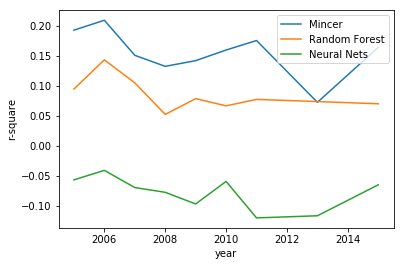

In [73]:
import matplotlib.pyplot as plt
plt.plot(years, res['ols'], label = "Mincer")
plt.plot(years, res['trees'], label = "Random Forest")
plt.plot(years, res['nets'], label = "Neural Nets")
plt.ylabel('r-square')
plt.xlabel('year')
plt.legend()
plt.show()

In [71]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.optimizers import adam


def mincer(X_train, y_train,  X_test, y_test):
    regressor = LinearRegression()
    reg = regressor.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    # return reg.score(X_test, y_test)
#     return np.mean(np.square(y_pred-y_test))
    return metrics.r2_score(y_test,y_pred)

def trees(X_train, y_train, X_test, y_test, model="rf", n_estimators=5, max_depth=5):
    if  model == "gb":
        regressor = GradientBoostingRegressor(max_depth=15)
    else:
        regressor = RandomForestRegressor(n_estimators=5, max_depth=1, random_state=1)
    reg = regressor.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    r2 = reg.score(X_test, y_test)
#     return np.mean(np.square(y_pred-y_test))
    return metrics.r2_score(y_test,y_pred)


def nn(X_train, y_train, X_test, y_test):
    dim =  X_train.shape[1]
    model = Sequential()
    model.add(Dense(8, input_dim=dim, activation='sigmoid'))
    model.add(Dense(4, activation='sigmoid'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation="linear"))
    
    opt = adam(lr=1e-3, decay=1e-3 / 200)
    model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
    model.fit(X_train, y_train, validation_data=(  X_test, y_test), epochs=200, batch_size=10)
    
    y_pred = model.predict(X_test)

#     print("The squrare error of this MLP is: {:.2f}".format(np.mean(np.square(y_pred.flatten() - y_test))))
    
    return metrics.r2_score(y_test,y_pred.flatten())